# Generating-ESRI-Shapefiles-from-CSV-File

In [9]:
import pandas as pd 
import geopandas as gpd
from pyproj import CRS

In [10]:
# Reading the csv file using Pandas 
airport_data = pd.read_csv('world_airports.csv')
airport_data.head()

,Country,Lon,Lat
0,ACORES,-14.394,-7.969
1,ACORES,-9.030,38.883
2,ACORES,-25.171,36.971
3,ACORES,-6.712,41.868
4,ACORES,-7.932,38.079


In [11]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   4188 non-null   object 
 1   Lon       4188 non-null   float64
 2   Lat       4188 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.3+ KB


<Axes: >

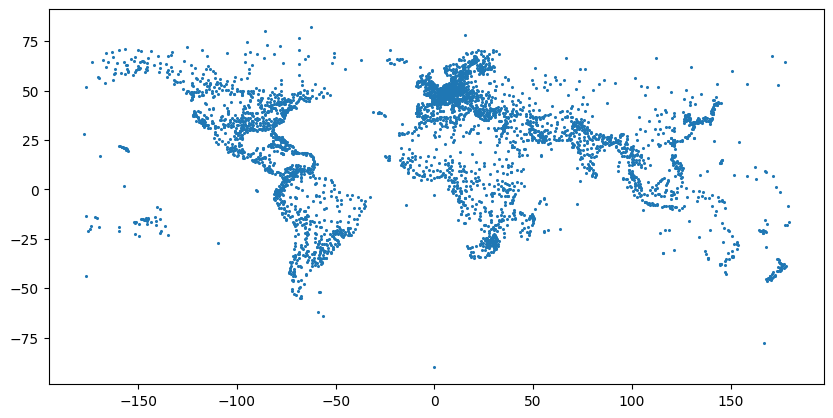

In [12]:
# Now creating GeoPandas GeoDataFrame using the Pandas Dataframe 
airport_gdf = gpd.GeoDataFrame(airport_data, geometry = gpd.points_from_xy(airport_data['Lon'],airport_data['Lat'] ))
airport_gdf.plot(markersize = 1.5, figsize = (10,10))

In [15]:
# Defining the ESRI WKT
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'

# Converting the WKT string to a CRS object
crs = CRS.from_wkt(ESRI_WKT)

# Seting the CRS for the GeoDataFrame
airport_gdf = airport_gdf.set_crs(crs)

# Saving the GeoDataFrame as an ESRI Shapefile
airport_gdf.to_file(filename='airports.shp', driver='ESRI Shapefile')

C:\Users\sufiy\AppData\Local\Programs\Python\Python310\lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Country ' to 'Country'
  ogr_write(


## Files Saved